#Data Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/reviews_0-250.csv"
df = pd.read_csv(file_path, on_bad_lines='warn')


<ipython-input-1-87f83597872c>:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='warn')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Preview the data
df.head()


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [4]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327015 entries, 0 to 327014
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                327015 non-null  int64  
 1   author_id                 327015 non-null  object 
 2   rating                    327015 non-null  int64  
 3   is_recommended            256887 non-null  float64
 4   helpfulness               142866 non-null  float64
 5   total_feedback_count      327015 non-null  int64  
 6   total_neg_feedback_count  327015 non-null  int64  
 7   total_pos_feedback_count  327015 non-null  int64  
 8   submission_time           327015 non-null  object 
 9   review_text               326415 non-null  object 
 10  review_title              237160 non-null  object 
 11  skin_tone                 266015 non-null  object 
 12  eye_color                 245743 non-null  object 
 13  skin_type                 285501 non-null  o

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
count,327015.000000,327015,327015.000000,256887.000000,142866.000000,327015.000000,327015.000000,327015.000000,327015,326415,237160,266015,245743,285501,245090,327014,327014,327014,327014.000000
unique,NaN,230798,NaN,NaN,NaN,NaN,NaN,NaN,5316,265253,111631,13,6,4,7,83,83,41,NaN
top,NaN,1288462295,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-11,"First of, I have and prove skin & I started us...",Love it!,light,brown,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,Tatcha,NaN
freq,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,808,8,1816,75528,128943,158560,115969,16138,16138,19977,NaN
mean,163507.000000,NaN,4.333076,0.839801,0.779456,3.521438,0.734183,2.787254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.443842
std,94401.243477,NaN,1.141202,0.366791,0.313842,29.106834,5.459710,25.475887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.132283
min,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
25%,81753.500000,NaN,4.000000,1.000000,0.666667,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000
50%,163507.000000,NaN,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000
75%,245260.500000,NaN,5.000000,1.000000,1.000000,3.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.000000


In [5]:
# Check total missing values in each column
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Display columns with missing values
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
}).sort_values(by='Percentage', ascending=False)

print("Missing Values Summary:\n")
print(missing_data)

# Drop rows with missing values in CRITICAL columns (essential for analysis)
critical_columns = ['rating', 'review_text', 'product_name']
df = df.dropna(subset=critical_columns)

# Fill missing values in LESS critical columns with 'Unknown' or appropriate placeholder
columns_to_fill = ['skin_tone', 'eye_color', 'hair_color', 'skin_type', 'brand_name']
for col in columns_to_fill:
    df[col] = df[col].fillna('Unknown')

# Optionally fill price column with median if you're using price
if df['price_usd'].isnull().sum() > 0:
    df['price_usd'] = df['price_usd'].fillna(df['price_usd'].median())

# Re-check for missing values after handling
print("\nMissing Values After Cleaning:\n")
print(df.isnull().sum())



Missing Values Summary:

                          Missing Values  Percentage
helpfulness                       184149   56.312096
review_title                       89855   27.477333
hair_color                         81925   25.052368
eye_color                          81272   24.852683
is_recommended                     70128   21.444888
skin_tone                          61000   18.653579
skin_type                          41514   12.694831
review_text                          600    0.183478
product_id                             1    0.000306
brand_name                             1    0.000306
product_name                           1    0.000306
price_usd                              1    0.000306
rating                                 0    0.000000
Unnamed: 0                             0    0.000000
author_id                              0    0.000000
total_pos_feedback_count               0    0.000000
submission_time                        0    0.000000
total_feedback_count 

<ipython-input-5-32f1df6844d9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna('Unknown')



Missing Values After Cleaning:

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended               70128
helpfulness                 183668
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                      0
review_title                 89255
skin_tone                        0
eye_color                        0
skin_type                        0
hair_color                       0
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64


In [6]:
# Remove duplicate rows if any
df = df.drop_duplicates()

# Confirm no duplicates remain
df.duplicated().sum()


np.int64(0)

In [7]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    return text

df['review_text'] = df['review_text'].apply(clean_text)


In [8]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 326415 entries, 0 to 327013
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                326415 non-null  int64  
 1   author_id                 326415 non-null  object 
 2   rating                    326415 non-null  int64  
 3   is_recommended            256287 non-null  float64
 4   helpfulness               142747 non-null  float64
 5   total_feedback_count      326415 non-null  int64  
 6   total_neg_feedback_count  326415 non-null  int64  
 7   total_pos_feedback_count  326415 non-null  int64  
 8   submission_time           326415 non-null  object 
 9   review_text               326415 non-null  object 
 10  review_title              237160 non-null  object 
 11  skin_tone                 326415 non-null  object 
 12  eye_color                 326415 non-null  object 
 13  skin_type                 326415 non-null  object

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,i use this with the nudestix citrus clean balm...,Taught me how to double cleanse!,Unknown,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,i bought this lip mask after reading the revie...,Disappointed,Unknown,Unknown,Unknown,Unknown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,my review title says it all i get so excited t...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,ive always loved this formula for a long time ...,Can't go wrong with any of them,Unknown,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,if you have dry cracked lips this is a must ha...,A must have !!!,light,hazel,combination,Unknown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


#Exploratory Data Analysis (EDA)

####Distribution of Ratings

<ipython-input-9-e054f17d017c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='magma')


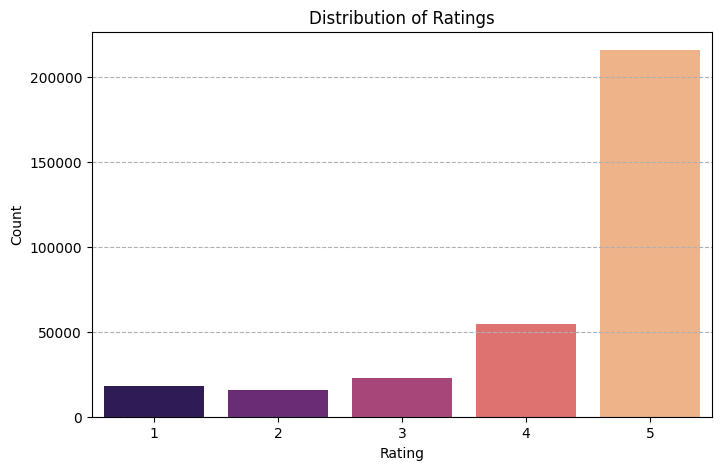

Average Rating: 4.33


In [9]:
# Plot distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating', palette='magma')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')
plt.show()

# Average rating overall
print("Average Rating:", round(df['rating'].mean(), 2))


##Most Reviewed Products

<ipython-input-10-fcef18c5a3a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')


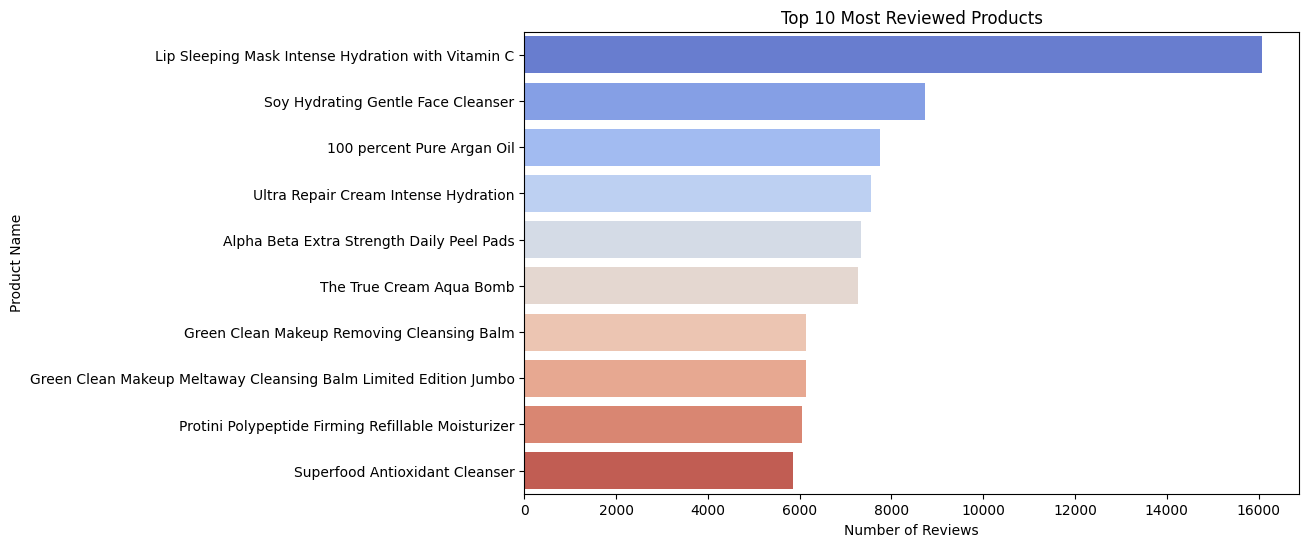

In [10]:
top_products = df['product_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()


##Average Ratings per Product

<ipython-input-11-e724dd8e68d1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_product.values, y=avg_rating_per_product.index, palette='viridis')


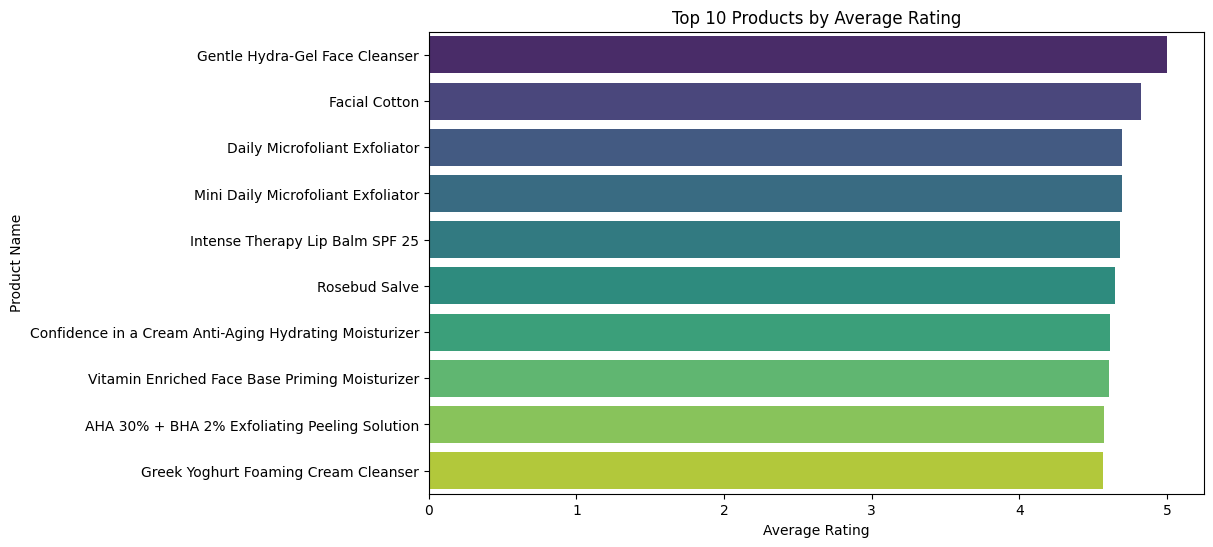

In [11]:
avg_rating_per_product = df.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_per_product.values, y=avg_rating_per_product.index, palette='viridis')
plt.title('Top 10 Products by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.show()


##Customer Behavior Patterns: Skin Type & Ratings

<ipython-input-12-763038eb0da1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='skin_type', y='rating', palette='pastel')


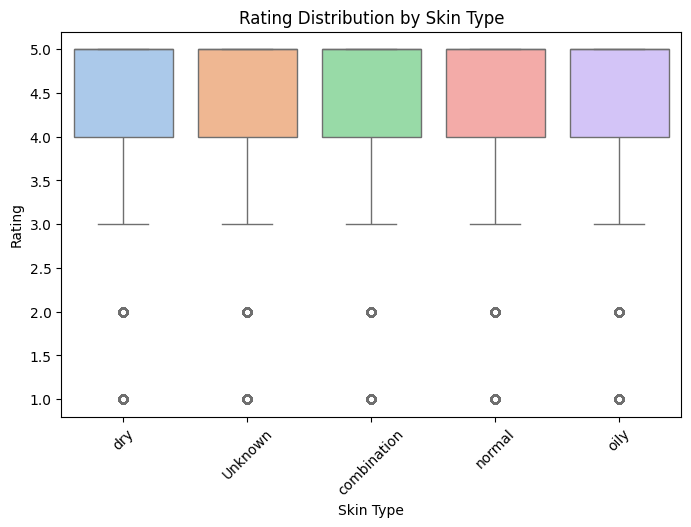

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='skin_type', y='rating', palette='pastel')
plt.title('Rating Distribution by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


##Descriptive Stats for Review Length


Review Length Statistics:
count    326415.000000
mean         58.094910
std          42.598846
min           0.000000
25%          30.000000
50%          48.000000
75%          74.000000
max         979.000000
Name: review_length, dtype: float64


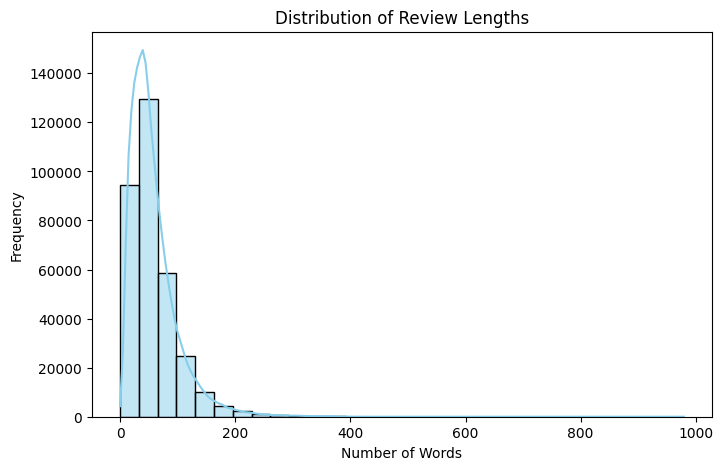

In [13]:
# Add new column for review text length
df['review_length'] = df['review_text'].apply(lambda x: len(str(x).split()))

# Basic stats
print("\nReview Length Statistics:")
print(df['review_length'].describe())

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['review_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


##Frequent Keywords in Reviews (Simple Word Count)

<ipython-input-14-c95ac45266e8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='Spectral')


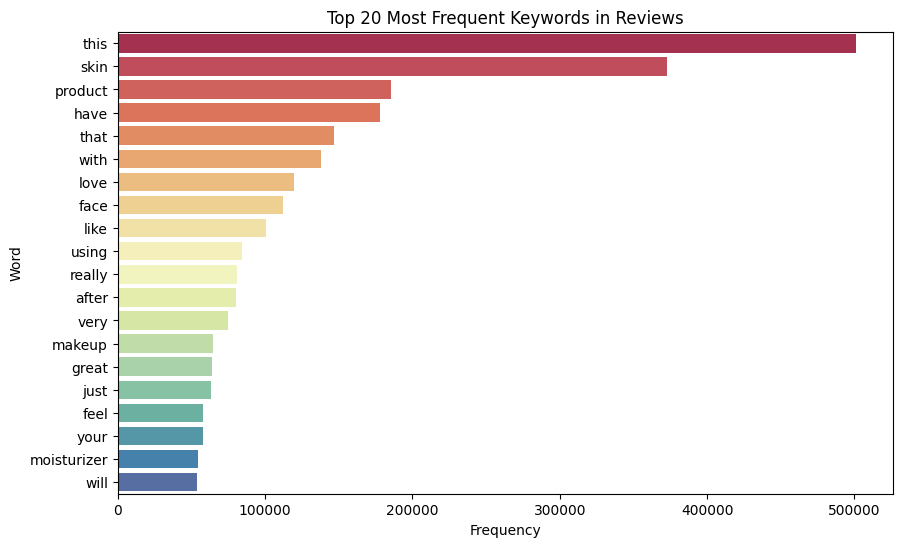

In [14]:
from collections import Counter
import re

# Combine all reviews
all_text = ' '.join(df['review_text'].dropna().astype(str).tolist())
all_text = re.sub(r'[^a-zA-Z\s]', '', all_text).lower()  # remove punctuation & lowercase
word_list = all_text.split()

# Count most common words (excluding short ones)
word_counts = Counter([word for word in word_list if len(word) > 3])
common_words = word_counts.most_common(20)

# Plot
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='Spectral')
plt.title('Top 20 Most Frequent Keywords in Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


# Predective Analysis: Vaidehi Narayanan (101544119)

In [15]:

# Convert date to datetime
df['submission_time'] = pd.to_datetime(df['submission_time'], errors='coerce')

# RFM variables
latest_date = df['submission_time'].max()
rfm = df.groupby('author_id').agg({
    'submission_time': lambda x: (latest_date - x.max()).days,
    'author_id': 'count',
    'price_usd': 'mean'
}).rename(columns={
    'submission_time': 'Recency',
    'author_id': 'Frequency',
    'price_usd': 'Monetary'
}).reset_index()

In [16]:
# Step 1: RFM Analysis (Recency, Frequency, Monetary)
from datetime import datetime

# Convert submission_time to datetime
df['submission_time'] = pd.to_datetime(df['submission_time'], errors='coerce')

# Get the most recent review date
latest_date = df['submission_time'].max()

# Group by author_id and calculate Recency, Frequency, and Monetary value
rfm = df.groupby('author_id').agg({
    'submission_time': lambda x: (latest_date - x.max()).days,
    'author_id': 'count',
    'price_usd': 'mean'
}).rename(columns={
    'submission_time': 'Recency',
    'author_id': 'Frequency',
    'price_usd': 'Monetary'
}).reset_index()

# Show the first few rows
rfm.head()

,author_id,Recency,Frequency,Monetary
0,538863,1601,1,24.0
1,549704,4352,1,49.0
2,557770,2587,1,28.0
3,582399,1581,1,24.0
4,594351,4961,1,98.0


In [17]:
!pip install textblob

In [18]:
#  Step 2: Sentiment Analysis
from textblob import TextBlob

# Create sentiment score column
df['sentiment'] = df['review_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [19]:
# Average sentiment per product
sentiment_by_product = df.groupby('product_name')['sentiment'].mean().sort_values(ascending=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fill missing reviews
df['review_text'] = df['review_text'].fillna("")

# Generate sentiment score
df['sentiment'] = df['review_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Polarity in Reviews')
plt.xlabel('Sentiment Score (-1 = Negative, 1 = Positive)')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Step 3: Predictive Model
# Ensure all are numeric and remove bad rows
for col in ['rating', 'sentiment', 'review_length', 'price_usd']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['rating', 'sentiment', 'review_length', 'price_usd', 'is_recommended'])

# Ensure 'is_recommended' is numeric too
df['is_recommended'] = pd.to_numeric(df['is_recommended'], errors='coerce')

# Final X and y
X = df[['rating', 'sentiment', 'review_length', 'price_usd']]
y = df['is_recommended'].astype(int)

# Feature engineering
df['review_length'] = df['review_text'].apply(lambda x: len(str(x)))

# Drop rows where target is missing
df = df.dropna(subset=['is_recommended'])

# Coerce all features to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')
df['price_usd'] = pd.to_numeric(df['price_usd'], errors='coerce')
df['review_length'] = pd.to_numeric(df['review_length'], errors='coerce')

# Drop rows with any NaN in the selected feature columns
df = df.dropna(subset=['rating', 'sentiment', 'review_length', 'price_usd'])

# Define X and y
X = df[['rating', 'sentiment', 'review_length', 'price_usd']]
y = df['is_recommended']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Prediction Accuracy:", accuracy)

In [ ]:
# Step 4: Cluster Analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd  # Import pandas for DataFrame handling

# Use RFM data
scaler = StandardScaler()

# Before scaling, drop rows with NaNs in RFM features:
rfm_clean = rfm[['Recency', 'Frequency', 'Monetary']].dropna()

# Scale the clean data
rfm_scaled = scaler.fit_transform(rfm_clean)

# KMeans Clustering
kmeans = KMeans(n_clusters=3)

# Fit to scaled data and get labels
cluster_labels = kmeans.fit_predict(rfm_scaled)

# Add cluster labels back to the original (or cleaned) RFM DataFrame:
rfm_clean['Cluster'] = cluster_labels  # Add to cleaned DataFrame
# or
# rfm['Cluster'] = pd.Series(cluster_labels, index=rfm_clean.index)  # Align to original

In [ ]:
# Step 5: Prediction Output
new_data = pd.DataFrame({
    'rating': [5],
    'sentiment': [0.8],
    'review_length': [250],
    'price_usd': [24]
})

prediction = model.predict(new_data)
print("Will recommend:" if prediction[0] == 1 else "Won't recommend")

Descriptive Ana